<h2>UNCC Fall 2018 Data Mining Course - Midterm, Fall 2018</h2>


# Midterm Part 1:  Data Preprocessing

In order to achieve useful datamining the data preprocessing is an important step. Data preprocessing consists of:
* Data cleaning
* Data transformation

You will be working with the cereals dataset (in the exam folder).  This dataset contains nutrition information for 77 breakfast cereals and includes the following variables:
Cereal Name
Cereal Manufacturer
Type (hot or cold)
Calories per serving
Grams of Protein
Grams of fat
Milligrams of sodium
Grams of fiber
Grams of carbohydrates
Grams of sugars
Milligrams of potassium
Percentage of recommended daily allowance of vitamins (0%, 25% or 100%)
Weight of one serving
Number of cups per serving
Shelf location (1 = bottom, 2 = middle, 3 = top)
Nutritional rating, calculated by Consumer reports

The data set has some missing data.

We are going to clean the dataset and explore the data.

Follow the instructions below!  Questions are identified as QUESTION 1, QUESTION 2, etc.  Sometimes questions require a written response, most questions however require code.  You can use the HW notebooks as a guide - both the orginal "training" notebooks and the HW solution notebooks are in canvas.  You are not to receive any "human help"!  If you have a problem which seems to be an issue with your program or perhaps the question is ambiguous then please email or text me.  Good luck!

## TURN IN your zipped folder at the end with the notebook file and csv file - Individual Work Only is allowed.

In [2]:
#run this code to import the necessary libraries for your work
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
import sklearn
%matplotlib inline 
sns.set()

### QUESTION 1:  Write code in the cell to load the cereals csv file - name the file "cereals" (1 point)


In [3]:
#Question 1 answer here
cereals = pd.read_csv("cereals.csv")

### QUESTION 2:  Display the top 5 rows in cereals (1 point)


In [4]:
#Question 2 answer here
cereals.head(5)

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


### QUESTION 3-A:  Display the structure of the dataframe. (1 point)


In [5]:
#Question 3-A answer here
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
Name            77 non-null object
Manuf           77 non-null object
Type            77 non-null object
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           76 non-null float64
Sugars          76 non-null float64
Potass          75 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Rating          77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: float64(7), int64(13), object(3)
memory usage: 13.9+ KB


### QUESTION 3-B:  Display the description or summary of the count, mean, etc. for continuous variables (1 point)

In [6]:
#Question 3-B answer here
cereals.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705,0.961039,0.077922,0.103896,0.298701,0.285714,0.103896,0.012987
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289,0.194771,0.269807,0.307127,0.460690,0.454716,0.307127,0.113961
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### QUESTION 4:  Display the description of just the Name object variable (there are 3 - just show one) (1 point)

In [8]:
#Question 4 answer here
cereals.Name.describe()

count            77
unique           77
top       Cheerios 
freq              1
Name: Name, dtype: object

### QUESTION 5:  Change the type of cereals.Name to category. (1 point)

In [19]:
#Question 5 answer here
cereals["Name"] = cereals["Name"].astype("category")

### QUESTION 6:  Change the type of cereals.Manuf to category then show the categories (1 point)

In [25]:
#Question 6 answer here
cereals["Manuf"] = cereals["Manuf"].astype("category")
print(cereals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
Name            77 non-null category
Manuf           77 non-null category
Type            77 non-null object
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           76 non-null float64
Sugars          76 non-null float64
Potass          75 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Rating          77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: category(2), float64(7), int64(13), object(1)
memory usage: 16.3+ KB
None


### QUESTION 7:  Change the type of cereals.Type to category then show the categories (1 point)

In [26]:
#Question 7 answer here
cereals["Type"] = cereals["Type"].astype("category")
print(cereals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
Name            77 non-null category
Manuf           77 non-null category
Type            77 non-null category
Calories        77 non-null int64
Protein         77 non-null int64
Fat             77 non-null int64
Sodium          77 non-null int64
Fiber           77 non-null float64
Carbo           76 non-null float64
Sugars          76 non-null float64
Potass          75 non-null float64
Vitamins        77 non-null int64
Shelf           77 non-null int64
Weight          77 non-null float64
Cups            77 non-null float64
Rating          77 non-null float64
Cold            77 non-null int64
Nabisco         77 non-null int64
Quaker          77 non-null int64
Kelloggs        77 non-null int64
GeneralMills    77 non-null int64
Ralston         77 non-null int64
AHFP            77 non-null int64
dtypes: category(3), float64(7), int64(13)
memory usage: 15.9 KB
None


### QUESTION 8: Create a crosstab table to show number of manufacturers for each type of cereal (1 point)

In [28]:
#Question 8 answer here
pd.crosstab(cereals.Name, cereals.Manuf, margins=True)

Manuf,A,G,K,N,P,Q,R,All
Name,,,,,,,,
100%_Bran,0,0,0,1,0,0,0,1
100%_Natural_Bran,0,0,0,0,0,1,0,1
All-Bran,0,0,1,0,0,0,0,1
All-Bran_with_Extra_Fiber,0,0,1,0,0,0,0,1
Almond_Delight,0,0,0,0,0,0,1,1
Apple_Cinnamon_Cheerios,0,1,0,0,0,0,0,1
Apple_Jacks,0,0,1,0,0,0,0,1
Basic_4,0,1,0,0,0,0,0,1
Bran_Chex,0,0,0,0,0,0,1,1


### QUESTION 9: Find the missing values. (1 point)

In [30]:
#Question 9 answer here
miss = cereals.isnull().sum()
print(miss[miss > 0])

Carbo     1
Sugars    1
Potass    2
dtype: int64


### QUESTION 10:  Replace the missing values in cereals in  the three columns with the mean of each column - hint: pandas provides a way to replace the missing values in a column with the mean - here is another way to fix the missing values for the cereals dataset: (1 point)
#Hint:  
#fill missing values with mean column values
#datasetname.fillna(datasetname.mean(), inplace=True)
#then to check your work count the number of NaN values in each column, you may also want to check the data
#print(datasetname.isnull().sum())


In [33]:
#Question 10 answer here
cereals["Carbo"].fillna((cereals["Carbo"].mean()), inplace=True)
cereals["Sugars"].fillna((cereals["Sugars"].mean()), inplace=True)
cereals["Potass"].fillna((cereals["Potass"].mean()), inplace=True)

#print(cereals.isnull().sum())

### QUESTION 11:  Transform Calories, Fat, Fiber, Sugars and Rating numeric variables with min max transformation either using a function or using the MinMaxScaler from sklearn and place the resulting dataset into cereals_minmax, (be careful with the categorical variables (three of them) - they need to stay in the cereals_minmax dataset along with other variables) note:  if outliers are present min max will change high values to 1 and low values to 0 - remember for the future that this isn't always desirable!  (1 point)


In [58]:
#Question 11 answer here
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
cereals_minmax = scaler.fit_transform(cereals.iloc[:,3:])
cereals_minmax = pd.DataFrame(cereals_minmax)
cereals_minmax.columns = cereals.iloc[:,3:].columns
cereals_minmax["Name"] = cereals["Name"]
cereals_minmax["Manuf"] = cereals["Manuf"]
cereals_minmax["Type"] = cereals["Type"]

cereals_minmax.head()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,...,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP,Name,Manuf,Type
0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,100%_Bran,N,C
1,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100%_Natural_Bran,Q,C
2,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.25,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,All-Bran,K,C
3,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,All-Bran_with_Extra_Fiber,K,C
4,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,0.265608,0.25,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Almond_Delight,R,C


## QUESTION 12 reducing skewness:  check Carbohydrates (Carbo) to see if the distribution is skewed.  Then transform using Square Root transformation (1 point)
.  


In [67]:
#Question 12 answer here
cereals["Carbo"].skew()

cereals["Carbo"].apply(np.sqrt)




0     2.236068
1     2.828427
2     2.645751
3     2.828427
4     3.741657
5     3.240370
6     3.316625
7     4.242641
8     3.872983
9     3.605551
10    3.464102
11    4.123106
12    3.605551
13    3.605551
14    3.464102
15    4.690416
16    4.582576
17    3.605551
18    3.464102
19    3.162278
20    4.582576
21    4.582576
22    3.316625
23    4.242641
24    3.316625
25    3.741657
26    3.741657
27    3.464102
28    3.741657
29    3.605551
        ...   
47    3.872983
48    3.872983
49    4.582576
50    4.242641
51    3.674235
52    3.316625
53    4.472136
54    3.605551
55    3.162278
56    3.741657
57    3.847419
58    3.741657
59    3.240370
60    3.872983
61    4.795832
62    4.690416
63    4.000000
64    4.358899
65    4.472136
66    3.000000
67    4.000000
68    3.872983
69    4.582576
70    3.872983
71    4.000000
72    4.582576
73    3.605551
74    4.123106
75    4.123106
76    4.000000
Name: Carbo, Length: 77, dtype: float64

### You are finished with Part 1 Preprocessing.  You have five more questions related to Chapter 3!  Be sure to save before continuing.

## Start of Part 2 - Data Exploration
### QUESTION 13:  Use seaborn countplot to create a bar chart showing the count of Categorical variables Type and Manuf in cereals.

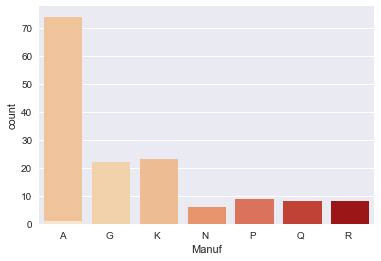

In [70]:
#Question 13 answer here
sns.countplot(x='Type',data=cereals, palette="OrRd")
sns.countplot(x='Manuf',data=cereals, palette="OrRd")

### Question 14:  Plot and show histograms for each of the numerical variables in cereals.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB5CFBE080>,
      dtype=object)

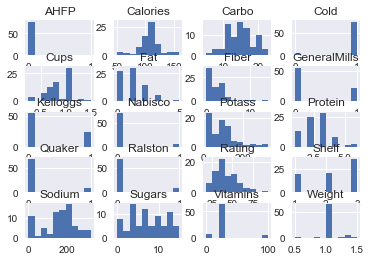

In [72]:
#Question 14 answer here
cereals.hist()

### Question 15:  Plot and show a Pairplot using "Manuf" as the hue.  This may take a few seconds to generate!  When it does, you can double click on the result to zoom in on the plots.

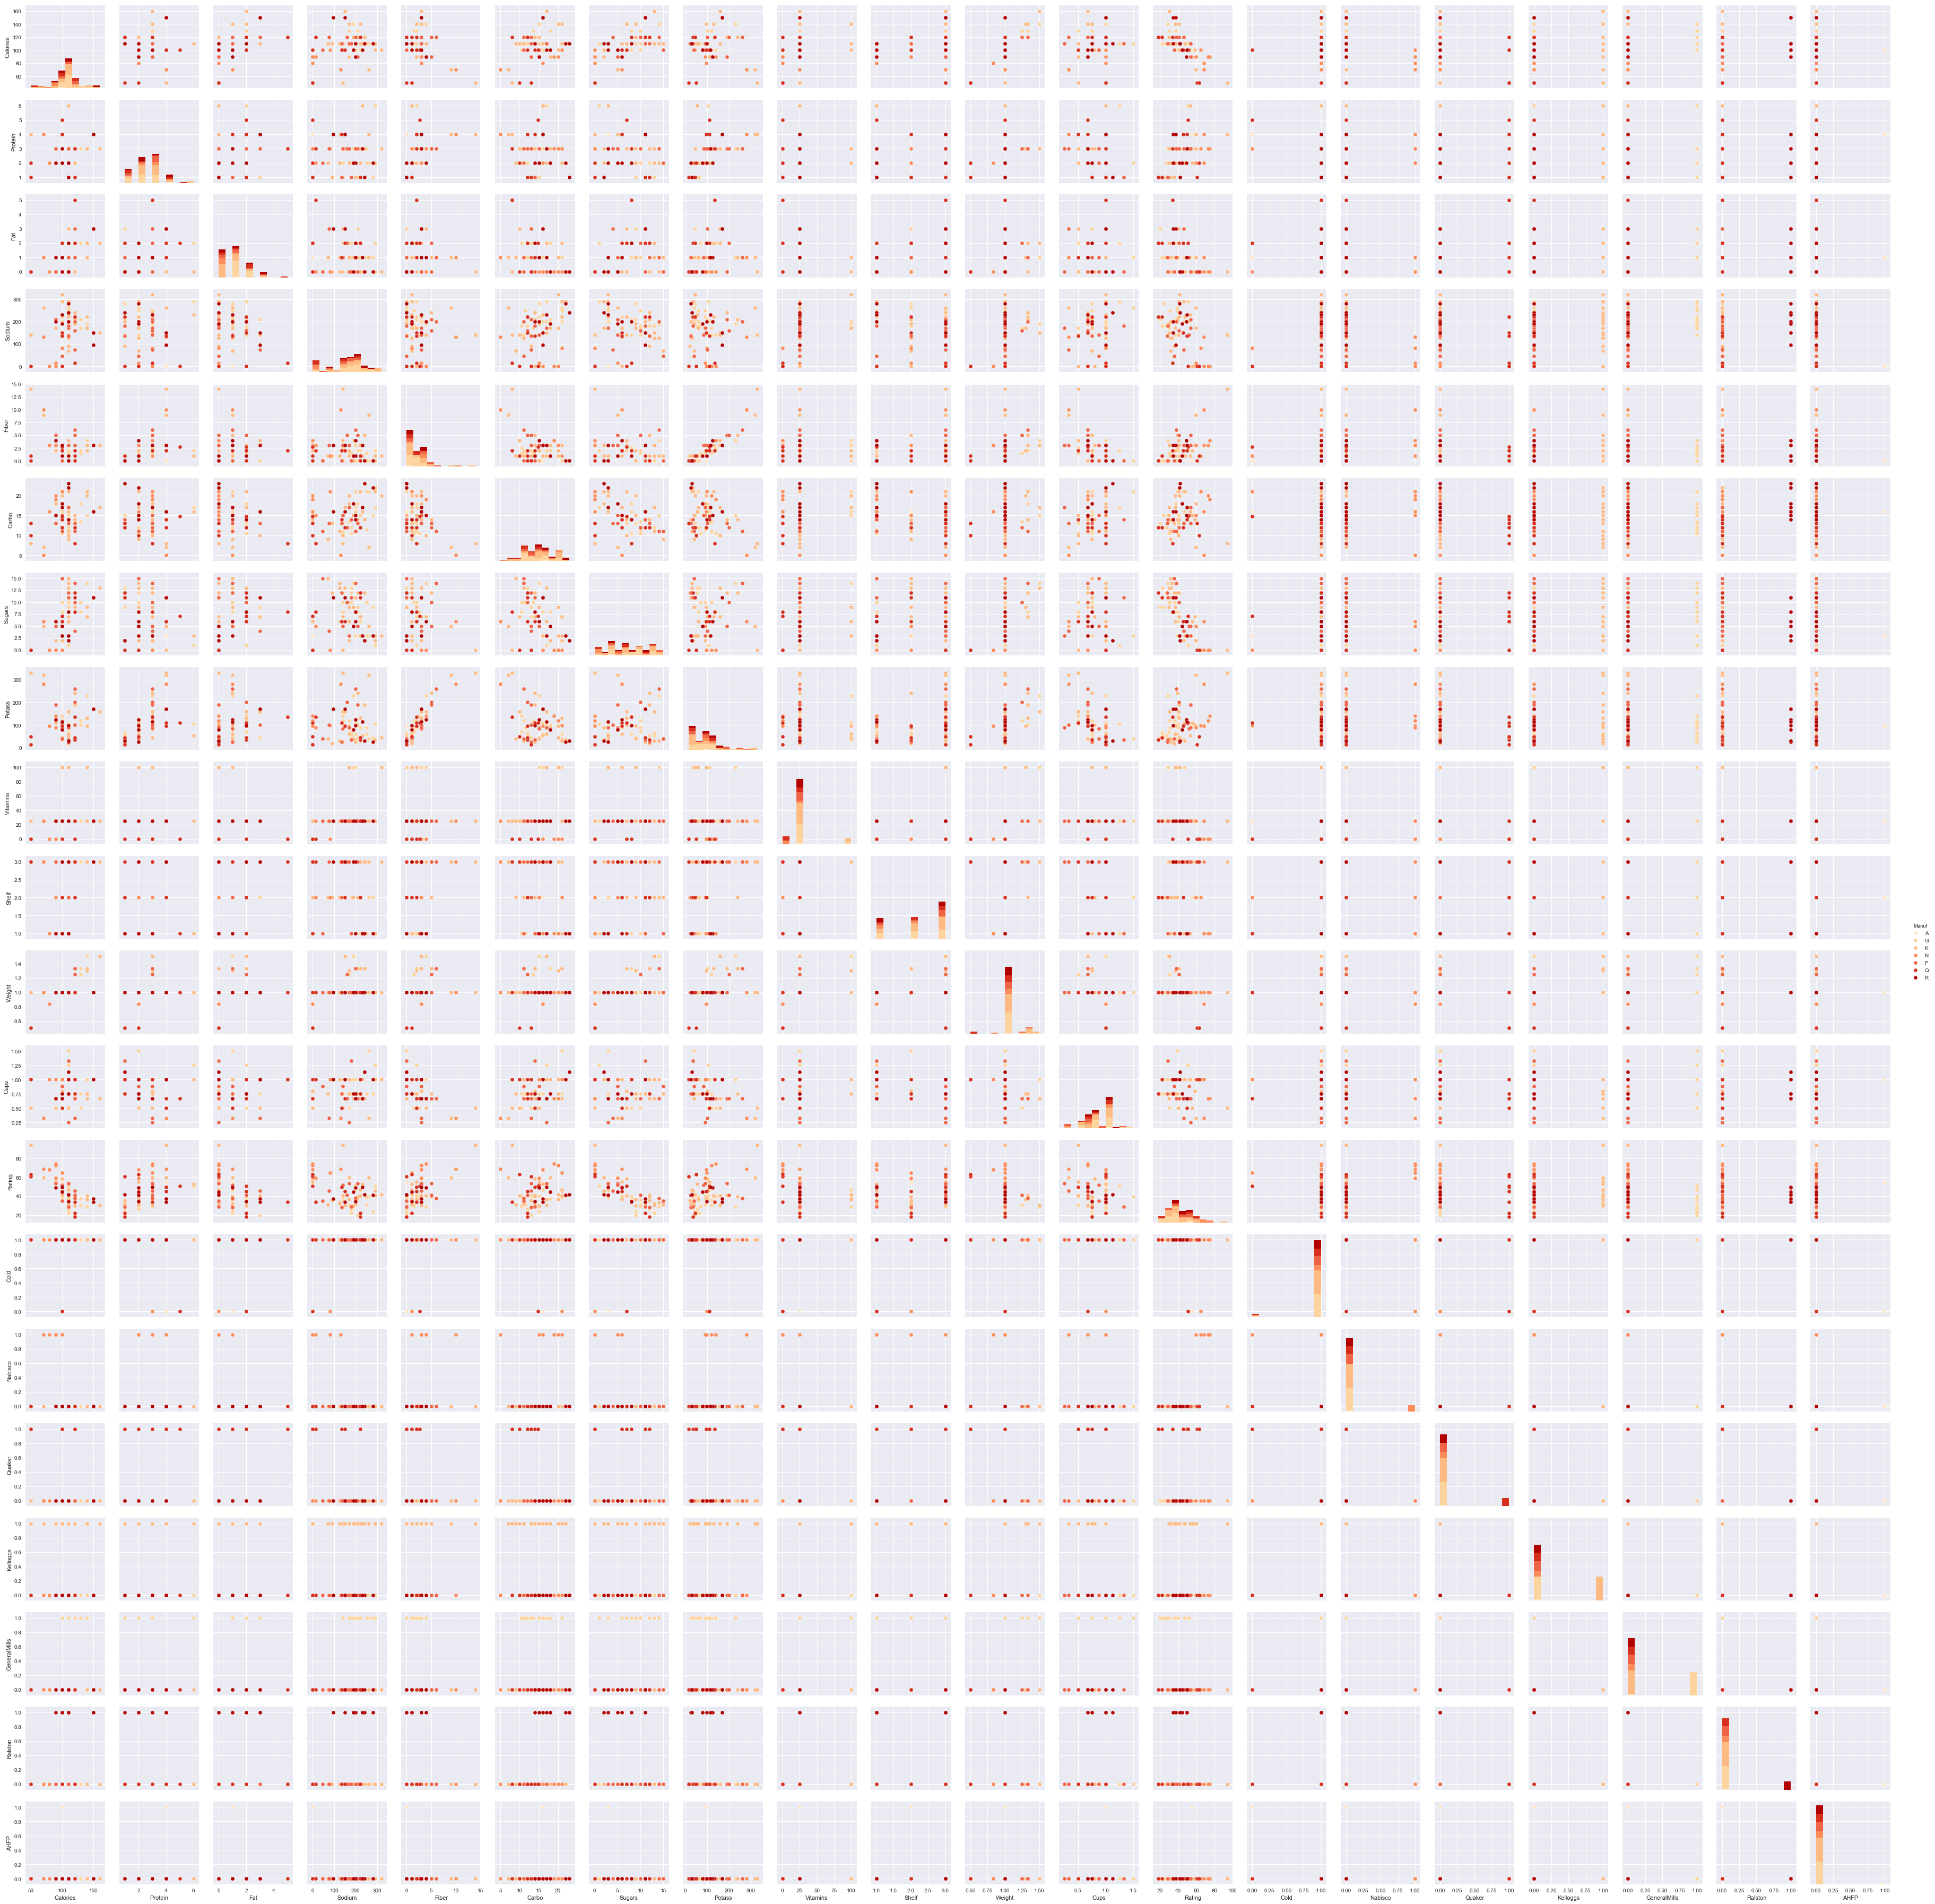

In [74]:
#Question 15 answer here
sns.pairplot(cereals, hue="Manuf", palette = "OrRd")

### Question 16:  Show the pearson correlation coefficient matrix with the numeric variables.  Note:  there is no need to use standardized variables for calculating the correlation.

In [79]:
#Question 16 answer here
cereals.corr()
#sns.heatmap(cereals.corr(),annot=True,cmap='cubehelix_r', linewidths = 0.1, linecolor = 'white')
#plt.show()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
Calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257423,0.566062,-0.071991,0.265356,0.097234,0.696091,0.087200,-0.689376,0.071596,-0.303605,-0.209030,0.061110,0.146392,0.142780,-0.040788
Protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.024160,-0.281905,0.562143,0.007335,0.133865,0.216158,-0.244469,0.470618,-0.269265,0.076942,0.024903,0.064035,-0.132155,-0.014230,0.153401
Fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.298074,0.300552,0.197823,-0.031156,0.263691,0.214625,-0.175892,-0.409284,0.002615,-0.246047,0.250976,-0.263875,0.221789,0.080710,-0.001490
Sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.290399,0.057425,-0.042312,0.361477,-0.069719,0.308576,0.119665,-0.401295,0.321552,-0.426439,-0.274636,0.118381,0.309668,0.157196,-0.219917
Fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380223,-0.138711,0.908647,-0.032243,0.297539,0.247226,-0.513061,0.584160,0.078114,0.226887,-0.117120,0.161841,-0.234842,-0.039826,-0.104249
Carbo,0.257423,-0.024160,-0.298074,0.290399,-0.380223,1.000000,-0.471184,-0.358557,0.216854,-0.189928,0.138432,0.366427,0.088513,-0.128701,0.090263,-0.249648,0.055477,-0.012359,0.249212,0.035617
Sugars,0.566062,-0.281905,0.300552,0.057425,-0.138711,-0.471184,1.000000,0.001348,0.097179,0.067411,0.455726,-0.048823,-0.762181,0.171658,-0.349331,-0.060910,0.081386,0.135850,-0.071018,-0.106875
Potass,-0.071991,0.562143,0.197823,-0.042312,0.908647,-0.358557,0.001348,1.000000,-0.005368,0.383303,0.419713,-0.499334,0.408320,-0.007455,0.162611,-0.119831,0.041382,-0.123141,0.015005,-0.006093
Vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.216854,0.097179,-0.005368,1.000000,0.299262,0.320324,0.128405,-0.240544,0.180633,-0.260795,-0.241556,0.192166,0.198895,-0.049805,-0.016778
Shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.189928,0.067411,0.383303,0.299262,1.000000,0.190762,-0.335269,0.025159,0.131730,-0.190189,0.068836,0.110495,-0.054619,-0.085544,-0.028818


### Question 17:  Look at the results in your correlation matrix.  Which attribute has the highest correlation with Rating? What is the value?  Your answer:  

In [ ]:
#Question 17 answer here
Nabisco Manufacturer has the highest correlation with .527063

### Question 18:  (LAST QUESTION) Create a chart of your choice below with any of the cereals datasets (not a simple bar chart please)!  You can use the examples in the Chapter 3 notebook OR explore documentation online and be creative!  (3 points)

### Turn in your work after completing this question.  Please save all work, then create a zipped folder and turn inthe zipped folder with your data file and the completed .ipynb file.

[Text(0,0.5,'Rating'),
 Text(0.5,0,'Sugar Content(g)'),
 Text(0.5,1,'Sugar Content vs Rating')]

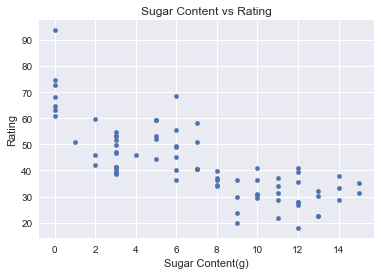

In [80]:
#Question 18 answer here
(cereals.plot.scatter(x='Sugars', y='Rating').set(title='Sugar Content vs Rating',xlabel='Sugar Content(g)',ylabel='Rating'))